### About

The data provided by STEG is composed of two files. The first one is comprised of client data and the second one contains billing history from 2005 to 2019.

There are 2 .zip files for download, train.zip, and test.zip and a SampleSubmission.csv. In each .zip file you will find a client and invoice file.

Variable definitions

#### Client:

    Client_id: Unique id for client
    District: District where the client is
    Client_catg: Category client belongs to
    Region: Area where the client is
    Creation_date: Date client joined
    Target: fraud:1 , not fraud: 0

#### Invoice data

    Client_id: Unique id for the client
    Invoice_date: Date of the invoice
    Tarif_type: Type of tax
    Counter_number:
    Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
    Counter_code:
    Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
    Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
    Consommation_level_1: Consumption_level_1
    Consommation_level_2: Consumption_level_2
    Consommation_level_3: Consumption_level_3
    Consommation_level_4: Consumption_level_4
    Old_index: Old index
    New_index: New index
    Months_number: Month number
    Counter_type: Type of counter


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import lightgbm
#from lightgbm import LGBMClassifier

from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.simplefilter('ignore')

In [54]:
dfc = pd.read_csv('data/train/client_train.csv', low_memory=False)
dfi = pd.read_csv('data/train/invoice_train.csv', low_memory=False)

In [55]:
#compare size of the various datasets
print(dfc.shape, dfi.shape)

(135493, 6) (4476749, 16)


In [56]:
dfi.head(15)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [57]:
dfi.sort_values(['client_id','invoice_date'])

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
22,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC
23,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC
24,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC
25,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC
28,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


We can see there are many entries for each client

In [58]:
dfc.head(15)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [59]:
#check for missing values
dfi.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [60]:
#check for missing values
dfc.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [79]:
# we check the values for certain columns and decider, wether we transform them to categorical or not.
dfi.tarif_type= dfi.tarif_type.astype('category')
dfi.counter_type = dfi.counter_type.astype('category')
dfi.counter_code = dfi.counter_code.astype('category')
dfi.reading_remarque = dfi.reading_remarque.astype('category')

# some columns can be reduced to int8, to save memory.
dfi.counter_coefficient = dfi.counter_coefficient.astype('int8')
dfi.months_number = dfi.months_number.astype('int16')

dfi.consommation_level_4 = dfi.consommation_level_4.astype('int32')
dfi.consommation_level_3 = dfi.consommation_level_3.astype('int32')
dfi.consommation_level_2 = dfi.consommation_level_2.astype('int32')
dfi.consommation_level_1 = dfi.consommation_level_1.astype('int32')

# dfi.counter_statue.value_counts()
dfi.counter_statue = dfi.counter_statue.astype('category')

In [61]:
dfi.value_counts('counter_statue')

counter_statue
0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

There are some suspicious values here - everything that isn't in the range of 0-5. We don't know what the values in the normal range mean, but we can be pretty sure that things like 'A' and '420' are not valid. We'll avoid dealing with it for now...

In [62]:
dfi.reading_remarque.value_counts()

reading_remarque
6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: count, dtype: int64

Here we have even less information about what the normal values are or what they mean - but we'll assume that everything in the range of 6-9 is a valid value, the others might not be but we can't be sure.


In [63]:
dfi.query("months_number > 24").count()

client_id               3528
invoice_date            3528
tarif_type              3528
counter_number          3528
counter_statue          3528
counter_code            3528
reading_remarque        3528
counter_coefficient     3528
consommation_level_1    3528
consommation_level_2    3528
consommation_level_3    3528
consommation_level_4    3528
old_index               3528
new_index               3528
months_number           3528
counter_type            3528
dtype: int64

In [64]:
dfi.query("months_number > 120").count()

client_id               1411
invoice_date            1411
tarif_type              1411
counter_number          1411
counter_statue          1411
counter_code            1411
reading_remarque        1411
counter_coefficient     1411
consommation_level_1    1411
consommation_level_2    1411
consommation_level_3    1411
consommation_level_4    1411
old_index               1411
new_index               1411
months_number           1411
counter_type            1411
dtype: int64

In [65]:
dfi.query("months_number > 120")

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
20211,train_Client_100551,2010-08-30,11,1099471,0,467,6,1,5,1200,10744,0,0,17815,25778,ELEC
20212,train_Client_100551,2010-06-05,11,1099471,0,467,9,1,5,1200,10566,0,0,9971,17815,ELEC
20213,train_Client_100551,2010-08-01,11,1099471,0,467,9,1,5,1200,8790,0,0,3311,9971,ELEC
20214,train_Client_100551,2009-03-09,11,1099471,0,467,9,1,5,1200,3024,0,0,495,3311,ELEC
20215,train_Client_100551,2011-03-14,11,1099471,5,467,6,1,5,0,0,0,0,25778,25778,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457223,train_Client_99465,2015-03-02,11,99072847,0,506,9,1,5,200,100,200,1810,459733,461273,ELEC
4457224,train_Client_99465,2011-04-07,11,99072847,0,506,6,1,5,300,3633,0,0,361738,364360,ELEC
4457225,train_Client_99465,2011-02-08,11,99072847,0,506,6,1,5,300,4327,0,0,364360,367445,ELEC
4457226,train_Client_99465,2015-06-01,11,99072847,0,506,9,1,5,200,100,200,1321,458519,459733,ELEC


In [66]:
dfi.query("months_number > 48").sort_values('months_number')

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
3145517,train_Client_63842,2013-01-11,11,34037,0,410,8,1,1996,0,0,0,2274,4270,50,ELEC
4216132,train_Client_92919,2012-06-25,11,528055,0,203,8,1,695,0,0,0,4538,5233,50,ELEC
3059497,train_Client_61474,2014-03-14,10,8396464,0,202,6,1,0,0,0,0,1477,1477,50,ELEC
4018756,train_Client_87511,2017-11-23,11,86273,0,413,8,1,0,0,0,0,6712,6712,50,ELEC
332996,train_Client_108967,2017-09-28,40,417427,0,5,9,1,79,0,0,0,231,310,50,GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160379,train_Client_131550,2019-03-05,45,5138377,0,40,9,1,3,5697,0,0,0,616491,620874,GAZ
1160378,train_Client_131550,2019-10-06,45,5138377,0,40,9,1,3,6041,0,0,0,620874,625521,GAZ
1160371,train_Client_131550,2019-02-07,45,5138377,0,40,9,1,3,5343,0,0,0,625521,629631,GAZ
1160370,train_Client_131550,2019-02-08,45,5138377,0,40,9,1,3,4676,0,0,0,629631,633228,GAZ


In [67]:
dfi.query("months_number > 48").client_id.nunique()

171

In [68]:
dfi.query("months_number > 36").sort_values('months_number')

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
571972,train_Client_115440,2018-05-02,11,7967443,0,203,6,1,0,0,0,0,13368,13368,37,ELEC
4079655,train_Client_89148,2010-05-19,10,924593,0,202,6,1,141,0,0,0,1967,2108,38,ELEC
2049934,train_Client_33900,2018-05-30,11,430856,0,203,8,1,5682,0,0,0,1977,7659,38,ELEC
4366011,train_Client_96983,2008-07-15,11,907468,0,203,6,1,0,0,0,0,100,100,38,ELEC
4346421,train_Client_96459,2017-07-26,11,6302136,0,410,8,1,0,0,0,0,51668,51668,38,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160379,train_Client_131550,2019-03-05,45,5138377,0,40,9,1,3,5697,0,0,0,616491,620874,GAZ
1160378,train_Client_131550,2019-10-06,45,5138377,0,40,9,1,3,6041,0,0,0,620874,625521,GAZ
1160371,train_Client_131550,2019-02-07,45,5138377,0,40,9,1,3,5343,0,0,0,625521,629631,GAZ
1160370,train_Client_131550,2019-02-08,45,5138377,0,40,9,1,3,4676,0,0,0,629631,633228,GAZ


In [69]:
dfi.query("months_number > 36").client_id.nunique()

442

Hmm, it seems like there are some cases where the months between readings is absurdly high - if we look at some of these examples, they seem to be restricted to particular clients, but as we will see later those are small numbers of clients who are majority not fraud cases.

We can also see from the above query that this seems to largely be a case where the old_index value has been shifted to the new_index column, and the new_index column was erroneously input into the months_number column. So we probably want to exclude these cases from our baseline model and further model analysis, as it's a small portion of our data and accurate value of months_number is important for our analysis.

In [70]:
#remove invoice date and messy month_number entries

dfi.drop(dfi[dfi['months_number'] > 48].index, axis=0, inplace=True)
list_erroneous_month_clients = dfi.query("months_number > 48").client_id.tolist()
dfi = dfi[~dfi['client_id'].isin(list_erroneous_month_clients)]
dfc = dfc[~dfc['client_id'].isin(list_erroneous_month_clients)]

## Defining our baseline model

A simple way to try to attempt to catch the fraud cases would be to look for anomalous (i.e. suspiciously low) usage in the invoices.

We could also try to take into account the counter status and reading remark - we might not know what exactly they mean, but a deviation from what we might call a normal value (such as the mode) might indicate something is amiss.

In [71]:
# define average monthly change in meter reading

dfi.eval('avg_month_use = (new_index - old_index) / months_number ', inplace=True)

In [72]:
dfi.avg_month_use.describe()

count    4.475200e+06
mean     1.578965e+02
std      2.234834e+03
min     -9.985390e+05
25%      1.975000e+01
50%      7.650000e+01
75%      1.575000e+02
max      2.744730e+05
Name: avg_month_use, dtype: float64

In [73]:
dfi.avg_month_use.value_counts()

avg_month_use
0.000000       472603
0.250000        18967
0.500000        16268
1.000000        11445
1.500000         9625
                ...  
3399.250000         1
6.461538            1
135.428571          1
580.875000          1
158.769231          1
Name: count, Length: 44771, dtype: int64

In [74]:
print("Percentage of invoices with no change in meter reading: {} %".format(round(dfi.avg_month_use.value_counts()[0] / dfi.shape[0] * 100, 2)))

Percentage of invoices with no change in meter reading: 10.56 %


In [75]:
n_fraud = dfc.target.value_counts(1)

print(f'Percentage of fraudulent clients: {round(n_fraud[1] * 100, 2)}%')

Percentage of fraudulent clients: 5.58%


We can see that actually, a large number of the invoices have a change of 0 in the meter reading - over 10%. We can also see that in at least one case there was a negative change in the meter reading, which is an obvious anomaly and highly suspicious (although this would be a pretty poor attempt at manipulating the meter, it could also be a case of a meter being replaced with a new one).

The most simple way we could try to catch the fraudsters is to look for all the invoices with a meter reading below a certain threshold (<= 1, <=0 etc.) and flag all of those clients as potential fraud cases. This is sure to generate some false positives - it could be that some people use very little or no electricity/gas consistently. But our primary success metric from the stakeholder's point of view is probably to catch all the cases of fraud (recall), with the minimum generation of false positives requiring unnecessary further investigation (precision) as a still-significant but secondary followup metric.

We are also, perhaps generously, assuming that our data is perfect. If the company is able to _perfectly_ detect who is committing fraud or not already, one might wonder how much they need us to figure it out with machine learning...anyway, let's try it.

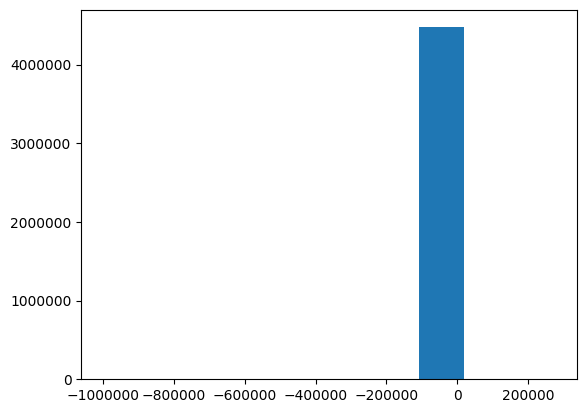

In [76]:
fig, ax = plt.subplots()

plt.hist(dfi.avg_month_use)
ax.ticklabel_format(useOffset=False, style='plain')

That's not very helpful...but we have a huge range of values here.

In [77]:
# I tried taking the log of the avg monthly use, but it sucks because a lot of rows where avg use is 0 end up being -inf
dfi['avg_use_log'] = np.log10(dfi.avg_month_use)

ValueError: supplied range of [-inf, 5.438499629195089] is not finite

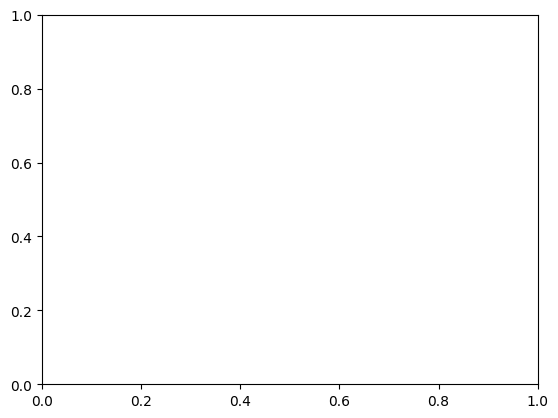

In [78]:
#plt.hist(dfi.avg_use_log)

In [ ]:
dfi.query('avg_use_log < 1')

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,avg_month_use,avg_use_log
90,train_Client_100,2009-10-22,11,2078,0,413,6,1,0,0,0,0,98,98,4,ELEC,0.00,-inf
91,train_Client_100,2006-10-10,11,2078,0,413,6,1,0,0,0,0,90,90,4,ELEC,0.00,-inf
92,train_Client_100,2007-02-15,11,2078,0,413,6,1,1,0,0,0,90,91,4,ELEC,0.25,-0.602060
93,train_Client_100,2007-06-18,11,2078,0,413,6,1,0,0,0,0,91,91,4,ELEC,0.00,-inf
94,train_Client_100,2008-06-19,11,2078,0,413,6,1,0,0,0,0,91,91,4,ELEC,0.00,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476682,train_Client_99996,2013-02-22,40,0,1,5,6,1,0,0,0,0,0,0,4,GAZ,0.00,-inf
4476706,train_Client_99996,2016-10-18,40,4811719,0,5,9,1,36,0,0,0,374,410,4,GAZ,9.00,0.954243
4476711,train_Client_99997,2015-08-10,40,0,0,5,9,1,36,0,0,0,760,796,4,GAZ,9.00,0.954243
4476719,train_Client_99997,2014-10-17,40,0,0,5,9,1,33,0,0,0,590,623,4,GAZ,8.25,0.916454


In [ ]:
#replace the -inf with NaN even though we forget about this anyway

dfi.avg_use_log.replace(to_replace=[np.inf, -np.inf], value=np.nan, inplace=True)

In [ ]:
dfi.avg_use_log.isnull().sum()

474947

In [ ]:
dfi.query('avg_month_use == 0').shape

(472681, 18)

In [80]:
dfi.query('avg_month_use < 1').shape[0] / len(dfi.avg_month_use) * 100

11.703963307131165

In [ ]:
dfi.query('avg_month_use < 0').client_id.nunique()

1120       train_Client_100024
2818        train_Client_10008
5257       train_Client_100144
5751       train_Client_100157
9097       train_Client_100257
                  ...         
4458606     train_Client_99506
4461423     train_Client_99580
4461805      train_Client_9959
4466699     train_Client_99733
4476318     train_Client_99985
Name: client_id, Length: 2264, dtype: object

For now we will use a baseline model with the following method:

* Find all the invoices with an average monthly use < 1
* Any client with an invoice matching this criterion is flagged as a fraud case

In [86]:
#For now we will use a threshold of average monthly use for each 

list_of_suspects = dfi.query('avg_month_use < 1').client_id.unique().tolist()

dfc.query(f'client_id in {list_of_suspects}').target.value_counts()

target
0.0    72923
1.0     5494
Name: count, dtype: int64

In [87]:
print(f"Recall score of baseline model: {round(5495 / 7566 * 100, 2)} %")

print(f"Precision score of baseline model: {round(5495 / len(list_of_suspects) * 100, 2)} %")

Recall score of baseline model: 72.63 %
Precision score of baseline model: 7.01 %


We achieve a fairly good recall score here - much better than chance. However, the precision is quite bad.

It predicts that <mark>over half</mark> of the clients are fraudulent!

Ideally our future model will have better precision as well as improved recall.

In [85]:
list2 = dfi.query('avg_month_use < 100').client_id.tolist()

dfc.query(f'client_id in {list2}').target.value_counts() #we can look at the counter status and reading remark to see if it helps

target
0.0    119557
1.0      7338
Name: count, dtype: int64

In [88]:
print(f"Recall score of alternate baseline model: {round(7338 / 7566 * 100, 2)} %")

print(f"Precision score of alternate baseline model: {round(7338 / len(list2) * 100, 2)} %")

Recall score of alternate baseline model: 96.99 %
Precision score of alternate baseline model: 0.28 %


We can see that by changing our threshold, we can achieve a very high recall, but very poor precision.

To plot the ROC:

In [89]:
y_true = dfc.target
y_pred = pd.Series([0] * dfc.shape[0])
y_pred = y_pred.mask(dfc.client_id.isin(list_of_suspects), 1)

In [97]:
y_pred.value_counts()

1.0    78417
0.0    57076
Name: count, dtype: int64

In [101]:
from sklearn.metrics import RocCurveDisplay

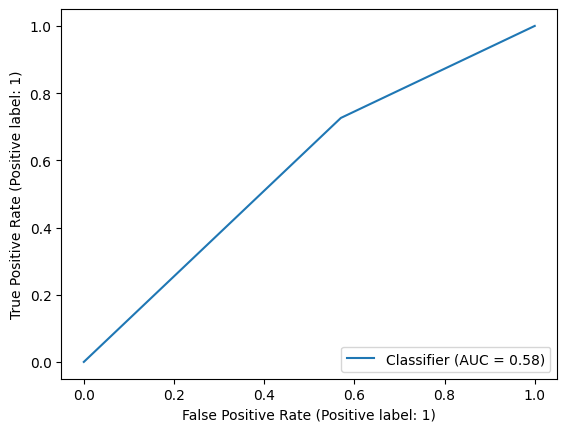

In [102]:
roc_curve(y_true,y_pred)
RocCurveDisplay.from_predictions(y_true,y_pred)

So the ROC of this method is actually not much better than chance - but for a baseline model, this makes sense.

In [ ]:
weird_months_number = dfi.query("months_number > 120").client_id.tolist()

dfc.query(f'client_id in {weird_months_number}').target.value_counts()

target
0.0    47
1.0     4
Name: count, dtype: int64

Interestingly, most of these weird months recordings are not registered fraud cases, so these happened more likely out of error somewhere on the company's end.

In [ ]:
weird_months_number = dfi.query("months_number > 24").client_id.tolist()

dfc.query(f'client_id in {weird_months_number}').target.value_counts()

target
0.0    1722
1.0      87
Name: count, dtype: int64